# Model recovery attack: `drive-diagnosis`

In [1]:
%load_ext autoreload
%autoreload 2

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import os
import mra
from mra import *
import models
from models import *

os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [5]:
def make_dataset(X, Y, f):
    x = tf.data.Dataset.from_tensor_slices(X)
    y = tf.data.Dataset.from_tensor_slices(Y)
    x = x.map(f)
    xy = tf.data.Dataset.zip((x, y))
    xy = xy.shuffle(10000)
    return xy

xy = np.loadtxt("../datasets/drive-diagnosis.txt")
np.random.shuffle(xy)
x = xy[:,0:-1]
y = xy[:,-1]

x = (x - np.min(x, axis=0))/(np.max(x, axis=0) - np.min(x, axis=0))
y = y.reshape((len(x), 1)).astype("float32")-1
train_ds = make_dataset(x, y, lambda t: t)

In [6]:
main = {}

for split in [2,3,4]:
    main[split] = mra(train_ds)
    make_f, make_g, make_generator = models.make_mlp(
        attr_num=48,
        class_num=11,
        split=split,
        fg_units=256,
        fg_act="relu",
        generator_units=[1024,512,256,128]
    )
    main[split].train(
        make_f,
        make_g,
        loss_fn=tf.keras.losses.SparseCategoricalCrossentropy(),
        batch_size=32,
        epoch=5,
        lr=0.001,
        verbose=True, log_every=3000
    )

Iteration 3000: Training loss: 0.4934
Iteration 6000: Training loss: 0.2774
Iteration 9000: Training loss: 0.1876
Iteration 3000: Training loss: 0.5208
Iteration 6000: Training loss: 0.2700
Iteration 9000: Training loss: 0.2075
Iteration 3000: Training loss: 0.4924
Iteration 6000: Training loss: 0.2844
Iteration 9000: Training loss: 0.1924


In [7]:
log_attack = {}
for split in [4,3,2]:
    print("split level = {}".format(split))
    log_attack[split] = main[split].attack(
        attack_iter=100,
        make_generator=make_generator,
        input_noise="normal",
        input_z=True,
        model_leak=True,
        lr_x=0.0001,
        lr_f=0.00001,
        epoch=50,
        iter_x=40,
        iter_f=1,
        verbose=True, log_every=1
    )

split level = 4
Iteration 0001: RG-uniform: 0.1782, RG-normal: 0.1562, reconstruction validation: 0.1472
Iteration 0002: RG-uniform: 0.1817, RG-normal: 0.1514, reconstruction validation: 0.1481
Iteration 0003: RG-uniform: 0.1838, RG-normal: 0.1550, reconstruction validation: 0.1356
Iteration 0004: RG-uniform: 0.1769, RG-normal: 0.1529, reconstruction validation: 0.1341
Iteration 0005: RG-uniform: 0.1749, RG-normal: 0.1625, reconstruction validation: 0.1321
Iteration 0006: RG-uniform: 0.1761, RG-normal: 0.1560, reconstruction validation: 0.1221
Iteration 0007: RG-uniform: 0.1864, RG-normal: 0.1556, reconstruction validation: 0.1164
Iteration 0008: RG-uniform: 0.1802, RG-normal: 0.1583, reconstruction validation: 0.1190
Iteration 0009: RG-uniform: 0.1796, RG-normal: 0.1539, reconstruction validation: 0.1165
Iteration 0010: RG-uniform: 0.1875, RG-normal: 0.1495, reconstruction validation: 0.1164
Iteration 0011: RG-uniform: 0.1761, RG-normal: 0.1596, reconstruction validation: 0.1134
Itera

Iteration 0093: RG-uniform: 0.1839, RG-normal: 0.1517, reconstruction validation: 0.0907
Iteration 0094: RG-uniform: 0.1766, RG-normal: 0.1546, reconstruction validation: 0.0864
Iteration 0095: RG-uniform: 0.1815, RG-normal: 0.1601, reconstruction validation: 0.0883
Iteration 0096: RG-uniform: 0.1789, RG-normal: 0.1624, reconstruction validation: 0.0889
Iteration 0097: RG-uniform: 0.1853, RG-normal: 0.1610, reconstruction validation: 0.0871
Iteration 0098: RG-uniform: 0.1769, RG-normal: 0.1561, reconstruction validation: 0.0784
Iteration 0099: RG-uniform: 0.1855, RG-normal: 0.1552, reconstruction validation: 0.0848
Iteration 0100: RG-uniform: 0.1775, RG-normal: 0.1576, reconstruction validation: 0.0816
split level = 3
Iteration 0001: RG-uniform: 0.1870, RG-normal: 0.1580, reconstruction validation: 0.0523
Iteration 0002: RG-uniform: 0.1748, RG-normal: 0.1612, reconstruction validation: 0.0467
Iteration 0003: RG-uniform: 0.1864, RG-normal: 0.1559, reconstruction validation: 0.0422
Itera

Iteration 0085: RG-uniform: 0.1818, RG-normal: 0.1600, reconstruction validation: 0.0286
Iteration 0086: RG-uniform: 0.1726, RG-normal: 0.1496, reconstruction validation: 0.0270
Iteration 0087: RG-uniform: 0.1725, RG-normal: 0.1596, reconstruction validation: 0.0281
Iteration 0088: RG-uniform: 0.1840, RG-normal: 0.1602, reconstruction validation: 0.0274
Iteration 0089: RG-uniform: 0.1773, RG-normal: 0.1599, reconstruction validation: 0.0268
Iteration 0090: RG-uniform: 0.1802, RG-normal: 0.1588, reconstruction validation: 0.0279
Iteration 0091: RG-uniform: 0.1795, RG-normal: 0.1631, reconstruction validation: 0.0268
Iteration 0092: RG-uniform: 0.1797, RG-normal: 0.1609, reconstruction validation: 0.0245
Iteration 0093: RG-uniform: 0.1700, RG-normal: 0.1575, reconstruction validation: 0.0264
Iteration 0094: RG-uniform: 0.1775, RG-normal: 0.1561, reconstruction validation: 0.0272
Iteration 0095: RG-uniform: 0.1713, RG-normal: 0.1593, reconstruction validation: 0.0257
Iteration 0096: RG-un

Iteration 0077: RG-uniform: 0.1732, RG-normal: 0.1717, reconstruction validation: 0.0023
Iteration 0078: RG-uniform: 0.1850, RG-normal: 0.1617, reconstruction validation: 0.0018
Iteration 0079: RG-uniform: 0.1854, RG-normal: 0.1568, reconstruction validation: 0.0016
Iteration 0080: RG-uniform: 0.1815, RG-normal: 0.1663, reconstruction validation: 0.0014
Iteration 0081: RG-uniform: 0.1788, RG-normal: 0.1573, reconstruction validation: 0.0014
Iteration 0082: RG-uniform: 0.1770, RG-normal: 0.1667, reconstruction validation: 0.0015
Iteration 0083: RG-uniform: 0.1777, RG-normal: 0.1537, reconstruction validation: 0.0015
Iteration 0084: RG-uniform: 0.1783, RG-normal: 0.1613, reconstruction validation: 0.0015
Iteration 0085: RG-uniform: 0.1820, RG-normal: 0.1549, reconstruction validation: 0.0014
Iteration 0086: RG-uniform: 0.1818, RG-normal: 0.1542, reconstruction validation: 0.0013
Iteration 0087: RG-uniform: 0.1758, RG-normal: 0.1613, reconstruction validation: 0.0017
Iteration 0088: RG-un

In [13]:
import pickle
with open('./log/drive.pkl', 'wb') as f:
    pickle.dump(log_attack, f)

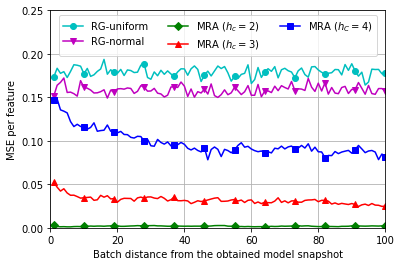

In [12]:
import matplotlib.pyplot as plt

plt.xlim([0,100])
plt.ylim([0,0.25])
plt.grid()
plt.ylabel('MSE per feature')
plt.xlabel('Batch distance from the obtained model snapshot')
ran = [i+1 for i in range(100)]
plt.plot(
    ran, log_attack[2][:,0], 'co-',
    ran, log_attack[2][:,1], 'mv-',
    ran, log_attack[2][:,2], 'gD-',
    ran, log_attack[3][:,2], 'r^-',
    ran, log_attack[4][:,2], 'bs-',
    markevery=np.arange(0, 101, 9))
plt.legend(['RG-uniform', 'RG-normal', 'MRA ($h_c=2$)', 'MRA ($h_c=3$)', 'MRA ($h_C=4$)'], loc='upper center', ncol=3)
plt.savefig("fig/drive.pdf", bbox_inches='tight')